# Systematic Literature Review DX in Shipping - Co-Authorship analysis

In [7]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import community as community_louvain  # Correct import
from collections import Counter
import numpy as np
import powerlaw

## Read the DB in

In [9]:
# Read in the file
#lit = pd.read_csv('C:/projects/dx_in_shipping/openalex_data_final.csv')
lit = pd.read_csv('./openalex_data.csv',low_memory=False)

In [19]:
# This cell is useful to check columns in the db. To be used only after having loaded the pandas df
substring = 'author_id'
# List all column names containing the substring using list comprehension
matching_columns = [k for k in lit.columns if substring in k]
#matching_columns.remove('referenced_works_count')
print(matching_columns)
#print(lit['authorships_0_author_id'])
#print(lit['id'])

['authorships_0_author_id', 'corresponding_author_ids_0', 'authorships_1_author_id', 'authorships_2_author_id', 'authorships_3_author_id', 'authorships_4_author_id', 'corresponding_author_ids', 'authorships_5_author_id', 'authorships_6_author_id', 'corresponding_author_ids_1', 'authorships_7_author_id', 'authorships_8_author_id', 'authorships_9_author_id', 'authorships_10_author_id', 'authorships_11_author_id', 'authorships_12_author_id', 'authorships_13_author_id', 'authorships_14_author_id', 'authorships_15_author_id', 'authorships_16_author_id', 'authorships_17_author_id', 'authorships_18_author_id', 'authorships_19_author_id', 'authorships_20_author_id', 'authorships_21_author_id', 'authorships_22_author_id', 'authorships_23_author_id', 'authorships_24_author_id', 'authorships_25_author_id', 'authorships_26_author_id', 'authorships_27_author_id', 'authorships_28_author_id', 'authorships_29_author_id', 'authorships_30_author_id', 'authorships_31_author_id', 'authorships_32_author_id

In [29]:
# First we need to identiy all available authors

authors_list = []

for index, row in lit.iterrows():
    for c in matching_columns:
        if not pd.isnull(row[c]) and not '_ids' in c and not 'corresponding' in c:
            if not row[c] in authors_list:
                authors_list.append(row[c])

In [117]:
print(len(authors_list))
#authors_list

7723


In [137]:
# Let's build the graph of co-authorship

G = nx.Graph()

for index, row in lit.iterrows():
    for cfirst in matching_columns:
        if not '_ids' in cfirst and not 'corresponding' in cfirst and not pd.isnull(row[cfirst]):
            for csecond in matching_columns:
                if not '_ids' in csecond and not 'corresponding' in csecond and not pd.isnull(row[csecond]):
                    if cfirst != csecond: # we don't link an author to itself
                        firstCountryVal = row.get(cfirst.split('_')[0] + '_' + cfirst.split('_')[1] + '_institutions_0_country_code','NaN')                        
                        secondCountryVal = row.get(csecond.split('_')[0] + '_' + csecond.split('_')[1] + '_institutions_0_country_code', 'NaN')
                        G.add_edge(row[cfirst], row[csecond], firstCountry = firstCountryVal, secondCountry = secondCountryVal, firstInstitute = 'a' , secondInstitute = 'b')

In [41]:
print(G.number_of_nodes())

7550


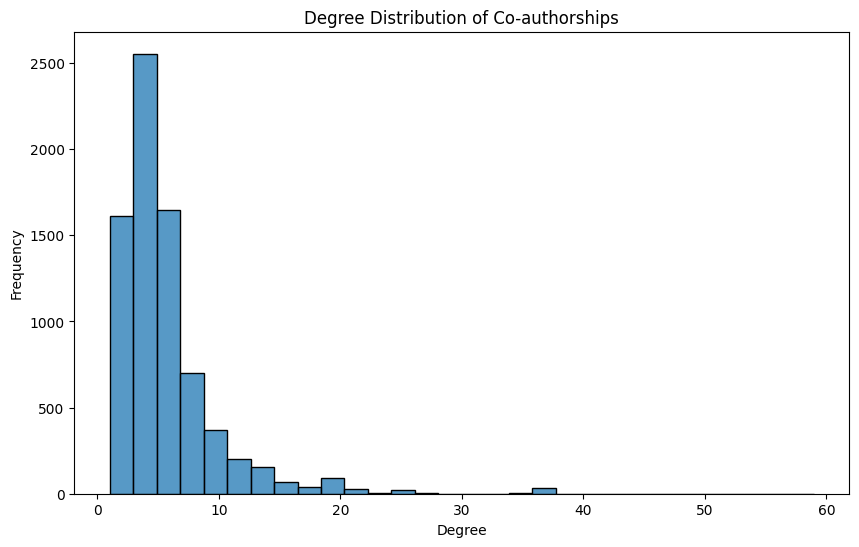

In [43]:
# Assuming G is your citation network graph
# Get a list of all degrees in the network
degrees = [deg for node, deg in G.degree()]

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot the degree distribution as a histogram
sns.histplot(degrees, bins=30, kde=False, stat="count")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution of Co-authorships")
plt.show()

In [45]:
# Statistical analysis for powerlaw fitting

# Step 1: Fit the power-law and other distributions
fit = powerlaw.Fit(degrees)

# Step 3: Compare power-law with other distributions
R, p = fit.distribution_compare('power_law', 'exponential')
print(f"Power law vs. Exponential: R={R}, p={p}")

R, p = fit.distribution_compare('power_law', 'lognormal')
print(f"Power law vs. Lognormal: R={R}, p={p}")

R, p = fit.distribution_compare('power_law', 'truncated_power_law')
print(f"Power law vs. Truncated Power law: R={R}, p={p}")

Calculating best minimal value for power law fit
Power law vs. Exponential: R=138.69088379741615, p=1.532644460474922e-16
Power law vs. Lognormal: R=-0.06108431372821199, p=0.3895000033731909
Power law vs. Truncated Power law: R=-0.48852083906710453, p=0.3229302611305951


C:\Users\FerrariniL\AppData\Local\anaconda3\Lib\site-packages\powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions


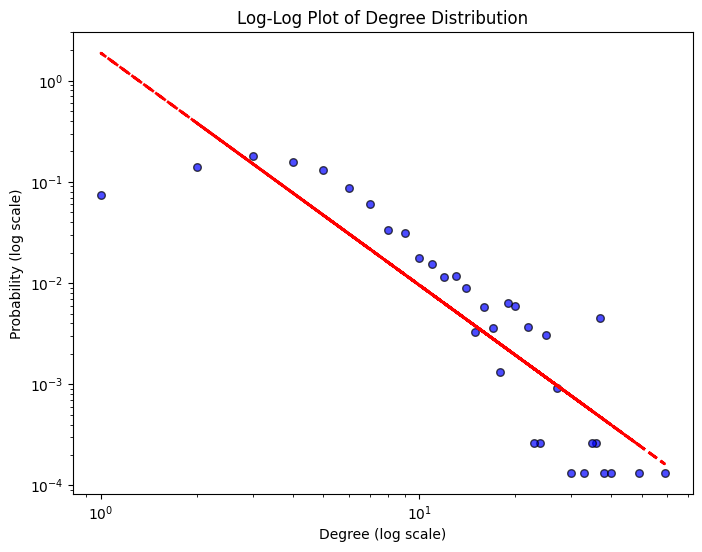

Slope: -2.2915863418536757, Intercept: 0.6256060814992532


In [47]:
# check for power-low distribution
# Step 1: Calculate degree frequencies
degree_counts = Counter(degrees)
degree, count = zip(*degree_counts.items())

# Normalize the counts to get the probability of each degree
count = np.array(count) / sum(count)

# Step 2: Plot on log-log scale
plt.figure(figsize=(8, 6))
plt.scatter(degree, count, color="b", s=30, alpha=0.7, edgecolor='k')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Degree (log scale)")
plt.ylabel("Probability (log scale)")
plt.title("Log-Log Plot of Degree Distribution")

# Optional: add a line of best fit to visualize linearity
slope, intercept = np.polyfit(np.log(degree), np.log(count), 1)
plt.plot(degree, np.exp(intercept) * np.power(degree, slope), color="red", linestyle="--", linewidth=2)

plt.show()
print(f'Slope: {slope}, Intercept: {intercept}')

In [49]:
# Node degree (number of connections) can represent influence in the network
influential_authors = sorted(G.degree, key=lambda x: x[1], reverse=True)
print("Most influential papers:", influential_authors[:10])

Most influential papers: [('https://openalex.org/A5034690093', 59), ('https://openalex.org/A5034166335', 49), ('https://openalex.org/A5061907283', 40), ('https://openalex.org/A5008967340', 38), ('https://openalex.org/A5038457105', 37), ('https://openalex.org/A5000488576', 37), ('https://openalex.org/A5032294516', 37), ('https://openalex.org/A5028595319', 37), ('https://openalex.org/A5056017119', 37), ('https://openalex.org/A5002574344', 37)]


In [101]:
# Calculate node degree for each node in the network
node_degrees = dict(G.degree())

# Convert node degrees to a DataFrame for easier manipulation
degree_df = pd.DataFrame(list(node_degrees.items()), columns=['node', 'degree'])

# Sort by degree in descending order and select the top nodes
top_nodes = degree_df.sort_values(by='degree', ascending=False).head(num_nodes_to_keep)['node']

# we want toc consider only the largest connected component
connected_components = list(nx.connected_components(G))

cc_size = []
for cc in connected_components:
    cc_size.append(len(cc))

cc_size.sort(reverse=True)
#print(cc_size)

N = 1
sorted_components = sorted(connected_components, key=len, reverse=True)  # Sort by size, largest first
# Step 2: Retain the two largest components
top_N_components = sorted_components[:N]  # Get the two largest components

# Combine the two largest components into a subgraph
# Use unpacking (*) to pass each set in top_two_components as separate arguments to set.union
combined_nodes = set().union(*top_N_components)

# Step 3: Create a subgraph of the largest connected component
G_lcc = G.subgraph(combined_nodes).copy()

#print(G.number_of_nodes())
#print(G_lcc.number_of_nodes())

In [103]:
# Let's create communities

# Step 1: Apply Louvain method for community detection
partition = community_louvain.best_partition(G_lcc)

# Step 2: Visualize the graph with community colors
values = [partition.get(node) for node in G_lcc.nodes()]

# Step 4: Create a force-directed layout
pos = nx.spring_layout(G_lcc, k=0.15, iterations=100)

In [104]:
# Get unique communities and map them to colors
unique_communities = set(values)
community_colors = {community: plt.cm.rainbow(i / len(unique_communities)) for i, community in enumerate(unique_communities)}

# Step 4: Create a list of handles and labels for the legend
handles = []
labels = []
for community, color in community_colors.items():
    # Create a patch for the legend with each community's color
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10))
    labels.append(f"Community {community}")

# Step 4: Display community-color mapping
print("Community to Color Mapping:")
for community, color in community_colors.items():
    print(f"Community {community}: {color}")

Community to Color Mapping:
Community 0: (0.5, 0.0, 1.0, 1.0)
Community 1: (0.4294117647058824, 0.11065268189150083, 0.9984636039674339, 1.0)
Community 2: (0.3588235294117647, 0.2199463578396686, 0.9938591368952737, 1.0)
Community 3: (0.28823529411764703, 0.3265387128400833, 0.9862007473534026, 1.0)
Community 4: (0.21764705882352942, 0.42912060877260894, 0.9755119679804366, 1.0)
Community 5: (0.1470588235294118, 0.5264321628773557, 0.961825643172819, 1.0)
Community 6: (0.07647058823529412, 0.6172782212897929, 0.9451838281608196, 1.0)
Community 7: (0.0019607843137254832, 0.7092813076058535, 0.9232891061054894, 1.0)
Community 8: (0.0725490196078431, 0.7829276104921027, 0.9005867023006374, 1.0)
Community 9: (0.14313725490196072, 0.846958210824467, 0.8751169828229928, 1.0)
Community 10: (0.21372549019607845, 0.9005867023006374, 0.8469582108244671, 1.0)
Community 11: (0.28431372549019607, 0.9431544344712774, 0.8161969123562217, 1.0)
Community 12: (0.3549019607843137, 0.9741386021045101, 0.7

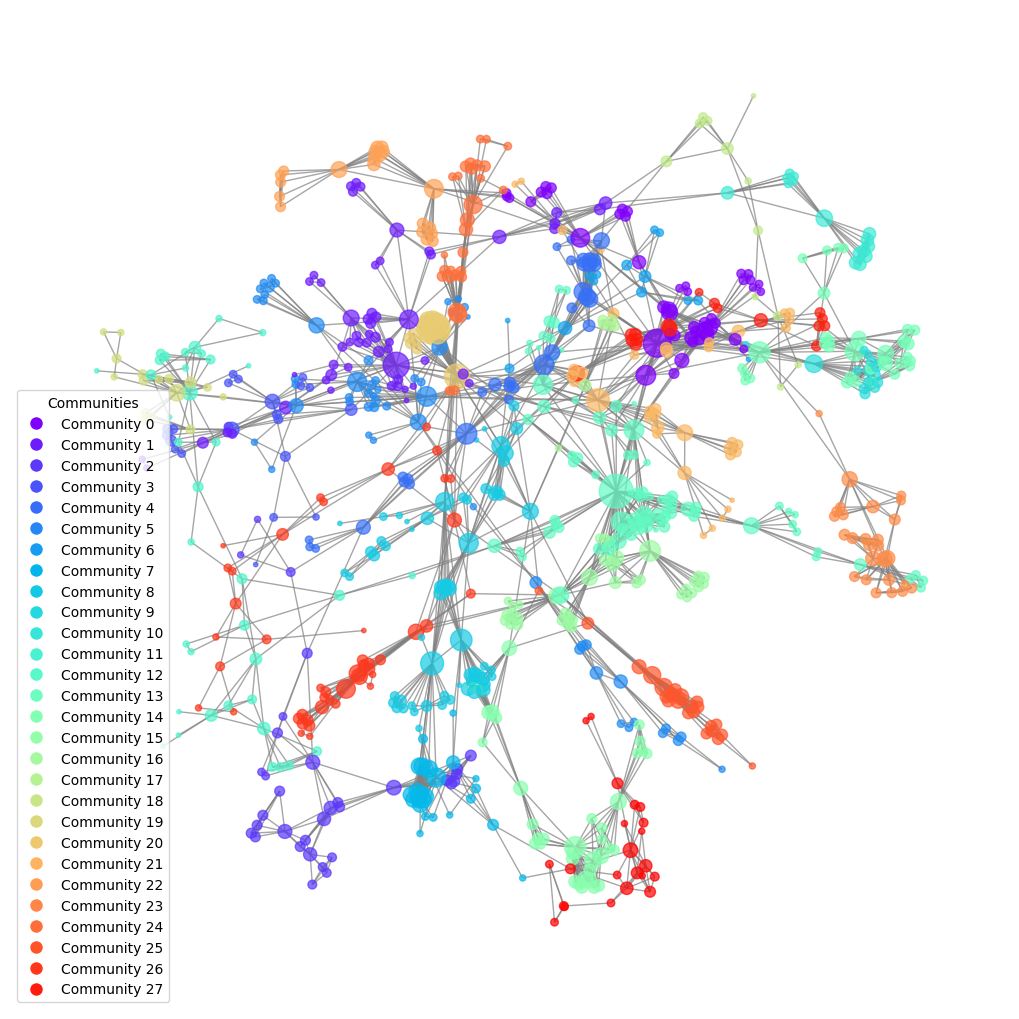

In [107]:
# Visualize the co-citation network

# Scale node sizes based on their degree in the original graph (before filtering)
node_sizes = [node_degrees[node] * 10 for node in G_lcc.nodes()]  # Multiply by 10 for visibility

plt.figure(figsize=(10, 10))  # Optional: Adjust figure size
nx.draw(G_lcc, pos, with_labels=False, node_size=node_sizes, node_color=values, cmap=plt.cm.rainbow, font_size=10, font_weight='bold', edge_color='gray', alpha=0.7)
# Add legend
plt.legend(handles=handles, labels=labels, title="Communities", loc="best", fontsize=10)
plt.show()

In [ ]:
# Now we want to see how institutions are distributed within each community.
# We also want to see how countries are distributed

In [119]:
# This cell is useful to check columns in the db. To be used only after having loaded the pandas df
substring = 'author_id'
# List all column names containing the substring using list comprehension
test_matching_columns = [k for k in lit.columns if substring in k]
#matching_columns.remove('referenced_works_count')
print(test_matching_columns)
#print(lit['authorships_0_author_id'])
#print(lit['id'])

['authorships_0_author_id', 'corresponding_author_ids_0', 'authorships_1_author_id', 'authorships_2_author_id', 'authorships_3_author_id', 'authorships_4_author_id', 'corresponding_author_ids', 'authorships_5_author_id', 'authorships_6_author_id', 'corresponding_author_ids_1', 'authorships_7_author_id', 'authorships_8_author_id', 'authorships_9_author_id', 'authorships_10_author_id', 'authorships_11_author_id', 'authorships_12_author_id', 'authorships_13_author_id', 'authorships_14_author_id', 'authorships_15_author_id', 'authorships_16_author_id', 'authorships_17_author_id', 'authorships_18_author_id', 'authorships_19_author_id', 'authorships_20_author_id', 'authorships_21_author_id', 'authorships_22_author_id', 'authorships_23_author_id', 'authorships_24_author_id', 'authorships_25_author_id', 'authorships_26_author_id', 'authorships_27_author_id', 'authorships_28_author_id', 'authorships_29_author_id', 'authorships_30_author_id', 'authorships_31_author_id', 'authorships_32_author_id

In [138]:
# This cell is useful to check columns in the db. To be used only after having loaded the pandas df
substring = 'institut'
# List all column names containing the substring using list comprehension
test_matching_columns = [k for k in lit.columns if substring in k]
#matching_columns.remove('referenced_works_count')
print(test_matching_columns)
#print(lit['authorships_0_author_id'])
#print(lit['id'])

['authorships_0_institutions_0_id', 'authorships_0_institutions_0_display_name', 'authorships_0_institutions_0_ror', 'authorships_0_institutions_0_country_code', 'authorships_0_institutions_0_type', 'authorships_0_institutions_0_lineage_0', 'authorships_0_affiliations_0_institution_ids_0', 'institution_assertions', 'institutions_distinct_count', 'corresponding_institution_ids_0', 'authorships_0_institutions', 'authorships_1_institutions', 'authorships_2_institutions', 'authorships_3_institutions', 'authorships_4_institutions', 'corresponding_institution_ids', 'authorships_1_institutions_0_id', 'authorships_1_institutions_0_display_name', 'authorships_1_institutions_0_ror', 'authorships_1_institutions_0_country_code', 'authorships_1_institutions_0_type', 'authorships_1_institutions_0_lineage_0', 'authorships_1_affiliations_0_institution_ids_0', 'authorships_2_institutions_0_id', 'authorships_2_institutions_0_display_name', 'authorships_2_institutions_0_ror', 'authorships_2_institutions_

In [111]:
partition

{'https://openalex.org/A5113600509': 0,
 'https://openalex.org/A5071445642': 1,
 'https://openalex.org/A5100362375': 0,
 'https://openalex.org/A5057004529': 2,
 'https://openalex.org/A5100631521': 0,
 'https://openalex.org/A5101980878': 5,
 'https://openalex.org/A5035491991': 4,
 'https://openalex.org/A5056924146': 1,
 'https://openalex.org/A5000965724': 5,
 'https://openalex.org/A5101942697': 0,
 'https://openalex.org/A5040378912': 6,
 'https://openalex.org/A5041564326': 7,
 'https://openalex.org/A5024829049': 1,
 'https://openalex.org/A5030622925': 8,
 'https://openalex.org/A5004851566': 9,
 'https://openalex.org/A5112192555': 20,
 'https://openalex.org/A5061851780': 11,
 'https://openalex.org/A5020668859': 9,
 'https://openalex.org/A5022212012': 12,
 'https://openalex.org/A5023371922': 13,
 'https://openalex.org/A5110963616': 12,
 'https://openalex.org/A5102016049': 14,
 'https://openalex.org/A5113744338': 12,
 'https://openalex.org/A5003203521': 15,
 'https://openalex.org/A50154030

In [109]:
# partition # this is a dictionary: the key is the article openalex id, and the value is the partition.

# we now collect the corresponding titles and link titles to partitions

partition_titles = {}
for k, v in partition.items():
    lit_f = lit[lit['id'] == k]
    if (len(lit_f)> 0):
        if v not in partition_titles:
            partition_titles[v] = [lit_f['title'].iloc[0]]
        else:
            partition_titles[v].append(lit_f['title'].iloc[0])
    else:
        print('not found')

not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found


In [18]:
# Next we use chatgpt to summarize the titles in each partition as one topic
print(partition_titles[7])

['Enhancing Maritime Cybersecurity through Operational Technology Sensor Data Fusion: A Comprehensive Survey and Analysis', "Concurrent Processing Cluster Design to Empower Simultaneous Prediction for Hundreds of Vessels' Trajectories in Near Real-Time", 'Incorporation of adaptive compression into a GPU parallel computing framework for analyzing large-scale vessel trajectories', 'Edge-Centric Secure Service Provisioning in IoT-Enabled Maritime Transportation Systems', 'A ship movement classification based on Automatic Identification System (AIS) data using Convolutional Neural Network', 'Maritime traffic partitioning: An adaptive semi-supervised spectral regularization approach for leveraging multi-graph evolutionary traffic interactions', 'Data-Driven Trajectory Quality Improvement for Promoting Intelligent Vessel Traffic Services in 6G-Enabled Maritime IoT Systems', 'Collision-avoidance navigation systems for Maritime Autonomous Surface Ships: A state of the art survey', 'AIS data-dr

## Next we use chatgpt to summarize the titles in each partition as one topic

### partition 0
The common theme across the research papers you provided is optimization and prediction of fuel consumption,
energy efficiency, and environmental impact in the maritime industry,
with a focus on machine learning, big data, and modeling techniques.

### partition 1
The common theme across these research papers is maritime safety, risk management, and the application of machine learning techniques to predict, analyze, and mitigate accidents and hazards in maritime operations. It also explores the intersection of autonomous ships, human factors, and intelligent systems in improving maritime safety.

### partition 2
The common theme across these research papers is machine learning, artificial intelligence, and big data applications in the maritime domain, with a focus on predictive analytics, vessel trajectory prediction, fuel consumption estimation, traffic management, cybersecurity, and autonomous ship operations.

### partition 3
The common theme across these research papers is the integration of Internet of Things (IoT), mobile edge computing, communication networks, and security within the maritime industry, with a particular focus on autonomous ships, data offloading, latency minimization, and communication technologies for maritime transportation systems.

### partition 4
The common theme across these research papers is the digital transformation and technological advancements within the maritime sector, particularly in relation to maritime logistics, container shipping, port operations, and the broader shipping supply chain. These studies explore the integration of digital twins, Industry 4.0 technologies, big data, IoT, machine learning, and artificial intelligence in improving efficiency, sustainability, and safety in maritime operations.

### partition 5
The common theme across these research papers revolves around the development and optimization of smart ports, focusing on the integration of Industry 4.0 technologies such as IoT, AI, big data, and blockchain. These studies emphasize how digitalization, automation, and energy efficiency are transforming port operations to make them more sustainable, efficient, and resilient in the face of global challenges. The research also explores the cybersecurity risks and sustainability efforts associated with green ports and smart infrastructure.

### partition 6
The common theme across these research papers is focused on maritime cybersecurity, with an emphasis on cyber risks associated with the digital transformation of the maritime industry, particularly as it pertains to the rise of autonomous vessels, smart shipping technologies, and the IoT-enabled maritime environment. These studies explore the vulnerabilities and cybersecurity challenges in both ports and ships, proposing various cyber risk assessments, threat modeling, and countermeasures to address emerging cyber threats. The papers also examine regulatory frameworks, cyber resilience training, and the impact of digitalization on ship systems, highlighting the need for proactive cybersecurity management.

### partition 7
The focus of these papers is on the adoption and application of blockchain technology in the maritime industry, specifically in areas like shipping, supply chains, and port management. The studies explore how blockchain can enhance efficiency, transparency, and sustainability within maritime logistics, including smart contracts, traceability, and decarbonization efforts. Key topics include investment strategies, barriers to adoption, collaborative platforms, and the impact of blockchain on shipping operations. These studies also examine technical sustainability, policy implications, and the business value of integrating blockchain in maritime logistics, highlighting the challenges and future potential of this transformative technology.

In [19]:
# Now we use centrality over the global graph to find the most influencial papers
# Calculate centrality
# Calculate Degree Centrality
degree_centrality = nx.degree_centrality(G)

# Calculate Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G, normalized=True)

# Calculate Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)

# Calculate Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

# Calculate PageRank
pagerank = nx.pagerank(G)


# Visualize with node size based on centrality
# plt.figure(figsize=(10, 8))
# nx.draw(G, with_labels=False, node_size=[v * 1000 for v in centrality.values()])
# plt.show()

In [20]:
# Display the top 5 nodes for each centrality measure
print("Top 5 nodes by Degree Centrality:")
print(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5])

print("\nTop 5 nodes by Betweenness Centrality:")
print(sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])

print("\nTop 5 nodes by Closeness Centrality:")
print(sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])

print("\nTop 5 nodes by Eigenvector Centrality:")
print(sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:5])

print("\nTop 5 nodes by PageRank:")
print(sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:5])

Top 5 nodes by Degree Centrality:
[('https://openalex.org/W3041382323', 0.05011565150346954), ('https://openalex.org/W4399283331', 0.044718581341557435), ('https://openalex.org/W2978644098', 0.04240555127216654), ('https://openalex.org/W2964482263', 0.03855050115651503), ('https://openalex.org/W4400493457', 0.03700848111025443)]

Top 5 nodes by Betweenness Centrality:
[('https://openalex.org/W3041382323', 0.11878184093636855), ('https://openalex.org/W4400493457', 0.0862369578746974), ('https://openalex.org/W2964482263', 0.07669997543402837), ('https://openalex.org/W4386245296', 0.050334142047570585), ('https://openalex.org/W4205557186', 0.0418721600603818)]

Top 5 nodes by Closeness Centrality:
[('https://openalex.org/W3041382323', 0.3261451499654046), ('https://openalex.org/W4400493457', 0.31977663520276656), ('https://openalex.org/W4386245296', 0.3132884136189423), ('https://openalex.org/W2964482263', 0.31049842774643804), ('https://openalex.org/W4225993858', 0.3027577106401543)]

To